In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets


In [2]:
def plot_decision_boundary(clf, X1, X2, y):
    min1, max1 = X1.min()-0.2, X1.max()+0.2
    min2, max2 = X2.min()-0.2, X2.max()+0.2

    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    grid = np.hstack((r1,r2))
    yhat = clf.predict(grid)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)

    zz[zz=='setosa'] = -1
    zz[zz=='versicolor'] = 0
    zz[zz=='virginica'] = 1

    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm,  alpha=0.2)

    plt.scatter(X1[y=='setosa'], X2[y=='setosa'], c="blue", label='setosa' )
    plt.scatter(X1[y=='versicolor'], X2[y=='versicolor'], c="green", label='versicolor' )
    plt.scatter(X1[y=='virginica'], X2[y=='virginica'], c="r", label='virginica' )

    plt.grid(True, which='both')
    plt.legend()


# Iris classification... and some terminology


There are three **classes** of iris floewers.

![](https://dl.dropboxusercontent.com/s/rc7xv2uu2ug0guf/iris.png?dl=0)

These three classes differ for some **features**:

- sepal length
- sepal width
- petal length
- petal width


In [3]:
# Load Iris dataset from sklearn
data = datasets.load_iris(as_frame=True)

# Make a padnas dataframe
iris = pd.DataFrame(data=data.data, columns=data.feature_names)
iris['species'] = pd.Categorical.from_codes(data.target, data.target_names)

# Show the dataframe
iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Problem

We find an iris flower with the following characteristics:
- sepal length = 5.9 cm
- sepal width = 2.7 cm
- petal length = 3.3 cm
- petal width = 1.2 cm

We need to identify the class of this flower.


### Framing the problem

The **task** is the **classification** of iris flowers based on their features.

An algorithm will learn the general rules to classify iris flowers starting from a data set of 150 flowers (**instances**) whose classes are already known. In other words, the algorithm will be **trained** over this dataset to perform the task. 

The algorithm will produce a **model** that contains a **decision boundary**. Once we have the decision boundary, we can classify the iris flower.

***

**aim**: data(features, unknown label) $\rightarrow$	 predictions for the label

**method**: data(features, known labels) $\rightarrow$ algorithm $\rightarrow$ model(set of rules) $\rightarrow$ decision boundary $\rightarrow$ classification

***


There are 4 features and one target variable. For semplicity, let's reduce the problem to two input features: sepal width and sepal length.

There is some overlap between the classes. Tracing a decision boundary is not obvious.


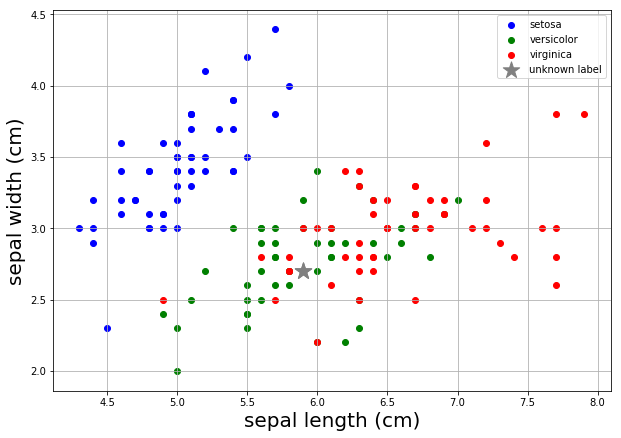

In [4]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x_feature = features[0]
y_feature = features[1]

plt.figure(figsize=(10,7))

plt.scatter(iris[x_feature][iris.species=='setosa'], iris[y_feature][iris.species=='setosa'], c="b", label='setosa' )
plt.scatter(iris[x_feature][iris.species=='versicolor'], iris[y_feature][iris.species=='versicolor'], c="g", label='versicolor' )
plt.scatter(iris[x_feature][iris.species=='virginica'], iris[y_feature][iris.species=='virginica'], c="r", label='virginica' )
plt.scatter([5.9,5.9], [2.7,2.7], s=300, marker='*', label='unknown label', color='grey')
plt.grid(True, which='both')
plt.xlabel(x_feature, fontsize=20)
plt.ylabel(y_feature, fontsize=20)
plt.legend()


### Coding the problem

An algorithm (e.g., Random Forest) will learn from the iris dataset a set of rules to classify iris flowers. The set of rules defines the **model**.

The model is a set of rules that can be represented as decision boundaries (for classification problems).

ML algorithms rely on a set of **hyperparameters** that are not know beforehand. You have to set them!

The idea is that we will create three models from three different sets of hyperparameters. Then we will choose the best model that can better generalize.

**Generalization** refers to your model's ability to adapt properly to new, previously unseen data. In principle, we should be able to use this model to classify every new iris flower we find.

In [5]:
# Defining the input features (X)
X = np.array(iris[['sepal length (cm)', 'sepal width (cm)']])

# Defining the target feature (y)
y = np.array(iris['species']).ravel()


Text(0.5, 1.0, 'Model 3')

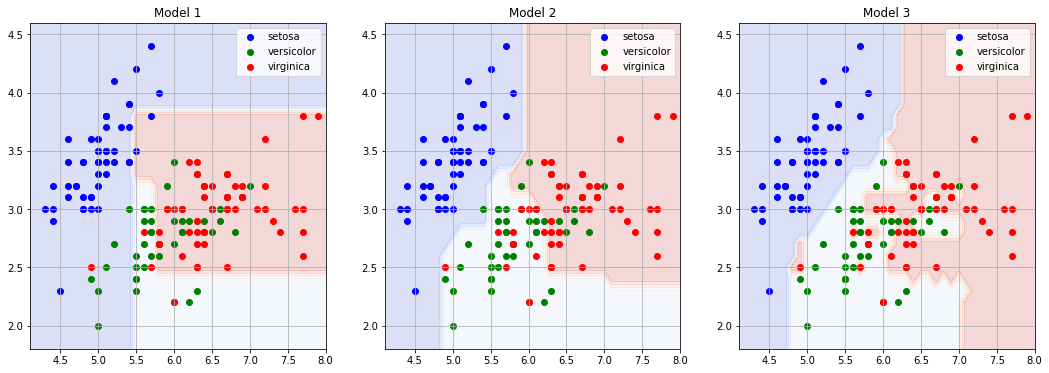

In [86]:
# Running three ML algorithms. Each model has different hyperparameters. Different results are expected.
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier(n_estimators=2, max_depth=2)
model_1.fit(X, y)

model_2 = RandomForestClassifier(n_estimators=100, max_depth=2)
model_2.fit(X, y)

model_3 = RandomForestClassifier(n_estimators=300, max_depth=20)
model_3.fit(X, y)

# Plotting decision boundaries
plt.figure(figsize=(18,6))
plt.subplot(131)
plot_decision_boundary(model_1, X[:, 0], X[:, 1], y)
plt.title("Model 1")

plt.subplot(132)
plot_decision_boundary(model_2, X[:, 0], X[:, 1], y)
plt.title("Model 2")

plt.subplot(133)
plot_decision_boundary(model_3, X[:, 0], X[:, 1], y)
plt.title("Model 3")


- QUESTION 4

### Make predictions

In [87]:
# Make predicions for the instances in X based on the model_1
y_pred_1 = model_1.predict(X)
print(y_pred_1)


['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'setosa' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'v

In [88]:
# These are the true values
print(y)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

### Evaluate the models

In [104]:
from sklearn.metrics import accuracy_score

# Make predicions for the instances in X based on the model_1
y_pred_1 = model_1.predict(X)

# Calculate the accuracy score. Accuracy = Number of correct predictions / Total number of predictions
acc_1 = accuracy_score(y,y_pred_1)
# Print
print("Accuracy model 1: {}".format(acc_1))

y_pred_2 = model_2.predict(X)
acc_2 = accuracy_score(y,y_pred_2)

print("Accuracy model 2: {}".format(acc_2))

y_pred_3 = model_3.predict(X)
acc_3 = accuracy_score(y,y_pred_3)

print("Accuracy model 3: {}".format(acc_3))

Accuracy model 1: 0.66
Accuracy model 2: 0.8133333333333334
Accuracy model 3: 0.8866666666666667


### Train/Tes split

We need a method to evaluate how well the model is able to generalize.

The solution. Use only a fraction of the total sample to train the model. Once the model is trained, use all the other instances that the algorithm has not seen during the training to test the model.

Thus, we split the original dataset in a **training set** and a **test set**.

<img src="https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png" style="width:50%;">

The training sample will train the algorithm.

The test sample will be used to evaluate the **generalisation error**.

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Number instances in the train sample: {}".format(len(X_train)))
print("Number instances in the test sample: {}".format(len(X_test)))


Number instances in the train sample: 120
Number instances in the test sample: 30


Text(0.5, 1.0, 'Model 3 - TEST sample - Accuracy 0.733')

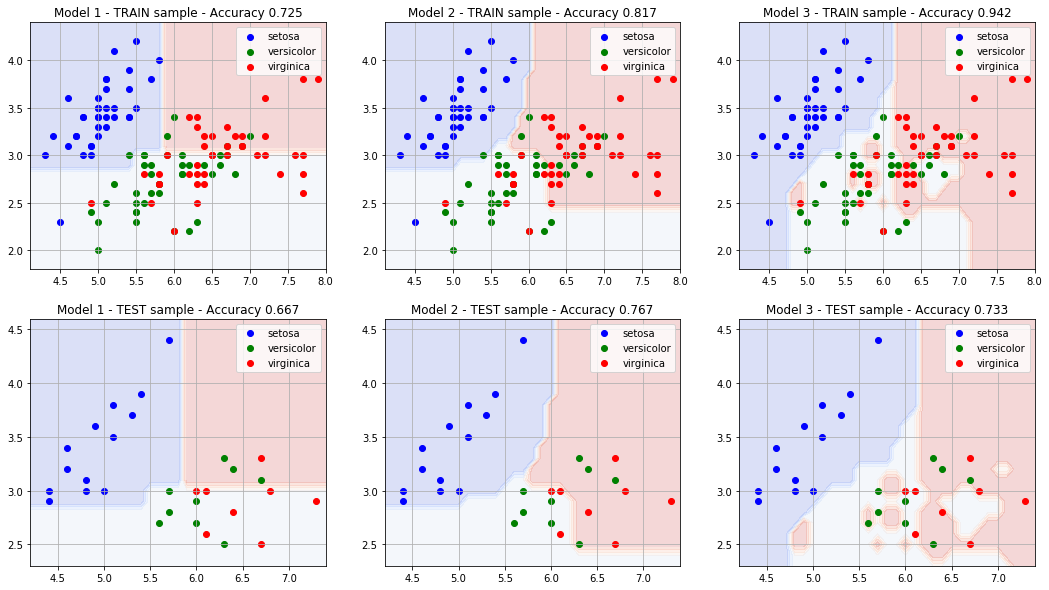

In [114]:
# Fit the models
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

# Plotting decision boundaries
plt.figure(figsize=(18,10))
plt.subplot(231)
plot_decision_boundary(model_1, X_train[:, 0], X_train[:, 1], y_train)
plt.title("Model 1 - TRAIN sample - Accuracy {}".format(round(accuracy_score(y_train,model_1.predict(X_train)),3)))

plt.subplot(232)
plot_decision_boundary(model_2, X_train[:, 0], X_train[:, 1], y_train)
plt.title("Model 2 - TRAIN sample - Accuracy {}".format(round(accuracy_score(y_train,model_2.predict(X_train)),3)))

plt.subplot(233)
plot_decision_boundary(model_3, X_train[:, 0], X_train[:, 1], y_train)
plt.title("Model 3 - TRAIN sample - Accuracy {}".format(round(accuracy_score(y_train,model_3.predict(X_train)),3)))

plt.subplot(234)
plot_decision_boundary(model_1, X_test[:, 0], X_test[:, 1], y_test)
plt.title("Model 1 - TEST sample - Accuracy {}".format(round(accuracy_score(y_test,model_1.predict(X_test)),3)))

plt.subplot(235)
plot_decision_boundary(model_2, X_test[:, 0], X_test[:, 1], y_test)
plt.title("Model 2 - TEST sample - Accuracy {}".format(round(accuracy_score(y_test,model_2.predict(X_test)),3)))

plt.subplot(236)
plot_decision_boundary(model_3, X_test[:, 0], X_test[:, 1], y_test)
plt.title("Model 3 - TEST sample - Accuracy {}".format(round(accuracy_score(y_test,model_3.predict(X_test)),3)))


In [115]:
X_iris_unlabelled = [[5.9, 2.7]]
pred = #WRITE THE CODE HERE 
print('Prediction: {}'.format(pred))

SyntaxError: invalid syntax (<ipython-input-115-9e6ec0c95324>, line 2)

### Soft classifiers

-- **Hard classifier** predicts labels.

-- **Soft classifier** predicts probabilities for each possible class.

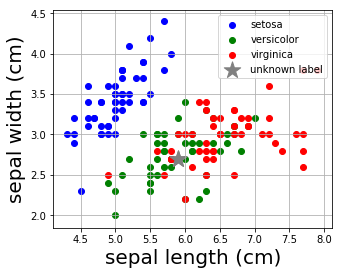

In [116]:
plt.figure(figsize=(5,4))

plt.scatter(iris[x_feature][iris.species=='setosa'], iris[y_feature][iris.species=='setosa'], c="b", label='setosa' )
plt.scatter(iris[x_feature][iris.species=='versicolor'], iris[y_feature][iris.species=='versicolor'], c="g", label='versicolor' )
plt.scatter(iris[x_feature][iris.species=='virginica'], iris[y_feature][iris.species=='virginica'], c="r", label='virginica' )
plt.scatter([5.9,5.9], [2.7,2.7], s=300, marker='*', label='unknown label', color='grey')
plt.grid(True, which='both')
plt.xlabel(x_feature, fontsize=20)
plt.ylabel(y_feature, fontsize=20)
plt.legend()


In [117]:
# Other algorithms also calculate a probability
from sklearn.svm import SVC
SVC_model = SVC(kernel="rbf", C=0.1, probability=True)
SVC_model.fit(X_train, y_train)

print("###### Predict probabilities")
print("Order of classes: {}".format(SVC_model.classes_))
prob = SVC_model.predict_proba([[5.9, 2.7]])
print("Probabilities: {}".format(prob))
print("")



prediction = SVC_model.predict([[5.9, 2.7]])
print("Prediction (the one with the highest probability): {}".format(prediction))
print("")



###### Predict probabilities
Order of classes: ['setosa' 'versicolor' 'virginica']
Probabilities: [[0.03718809 0.5092854  0.45352651]]

Prediction (the one with the highest probability): ['versicolor']



### Now your turn...

1) Train an algorithm using the 4 features of the iris dataset.

2) Evaluate the generalization error.

3) Predict the probabilities for each of the three classes for the following flower

- sepal length = 5.9 cm
- sepal width = 2.7 cm
- petal length = 3.3 cm
- petal width = 1.2 cm


In [118]:
# Defining the input features (X)
X = np.array(iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])

# Defining the target feature (y)
y = np.array(iris['species']).ravel()

# Continue the code...

### Important terms

- **task**: classification, regression, clustering, etc...
- **instance**
- **feature** (X): a class, discrete values, continuous values (only use the important ones!)
- **target variable** (y): a class, discrete values, continuous values
- **training sample**
- **test sample**
- **generalisation**
- **generalisation error**
- difference between **algorithm** and **model**
- **hyperparameters**
- **decision boundary**
- difference between **classification** and **regression**
- difference between **supervised** and **unsupervised** learning


 - QUESTION 6
 - QUESTION 8
 - QUESTION 10
 - QUESTION 12

### Coding ML

The important package is <a href="https://scikit-learn.org/stable/index.html">scikit-learn</a>.

# Main challenges of Machine Learning

You will face many types of challenges. Some are related to ''bad models'', others are related to ''bad data''. 

### Overfitting the training data (bad model)

Overgeneralizing is something that we humans do all too often, and unfortunately machines can fall into the same trap if we are not careful. In Machine Learning this is called overfitting: it means that the model performs well on the training data, but it does not generalize well.

Solution: reduce the complexity of the model. 

### Underfitting the training data (bad model)

As you might guess, underfitting is the opposite of overfitting: it occurs when your model is too simple to learn the underlying structure of the data.

![](https://dl.dropboxusercontent.com/s/ibjj7k1rvip9vli/bad_models.png?dl=0)

- QUESTION 14
- QUESTION 16

### Incorrect algorithm (bad model)

The choice of your algorithms is very important. There is a extremely wide range of Machine Learning algorithms that you can possibly choose. Each of them has its own characteristic. There are algorithms that work only with numbers. Others can work also with labels. Some algorithms are prone to overfitting, others to underfitting. Some algorithms have excellent performances, but require very large training samples. Other are just good enough, but they can be trained by small data sets. Some algorithms can predict a class with a probability. Other algorithms do not return probabilities. Some algorithms can work with thousands on input features, while others prefer a small number of features.


### Insufficient Quantity of Training Data (bad data)

It takes a lot of data to properly train a dataset and evaluate its generalising error. However, the number of data you need it is not known a priori. It strongly depends on the type of the algorithm and the type of problem. When you feel you have a small dataset, use a simpler algorithm.

### Nonrepresentative Training Data (bad data)

It is crucial to use a training set that is representative of the cases you want to generalize to. This is often harder than it sounds, because there may be biases and correlations in your ddataset. These biases and correlations will be folded in your model. Sometimes it is ok, sometimes it is not ok: it depends on what you want to do with your data.

![](https://dl.dropboxusercontent.com/s/7bd7lhcltq2utnr/elephant.png?dl=0)

##### Biases

You train an algorithm that is able to predict [alpha/Fe] and [Fe/H] from stellar spectra.
The training set is shown in the figure below.

The resulting model will never be able to recognize the outlier.

<img src="https://dl.dropboxusercontent.com/s/6kh73vo8vmjy7zr/afe-disk.jpg?dl=0" width="600">


##### Correlations

Another important question you may want to ask to yourself.

Is the algorithm really learning how to extract the information on chemical abundances from stellar spectra or is it just learning that when [Fe/H] is low, then [alpha/Fe] must be high?

<img src="https://dl.dropboxusercontent.com/s/qvazy1j732juvhl/learning_what.png?dl=0" width="1000">

- Note: biases and correlations are always unavidable in observational data sets. 

### Poor-Quality Data (bad data)

Obviously, if your training data is full of errors, outliers, and noise (e.g., due to poor-quality measurements), it will make it harder for the system to detect the underlying patterns, so your system is less likely to perform well. It is often well worth the effort to spend time cleaning up your training data.

### Irrelevant Features (bad data)

As the saying goes: garbage in, garbage out. Your system will only be capable of learning if the training data contains enough relevant features and not too many irrelevant ones. A critical part of the success of a Machine Learning project is coming up with a good set of features to train on. 

Here some advices:

- Feature selection: selecting the most useful features to train on among existing features.

- Creating new features by gathering new data.

- Feature extraction: combine or edit existing features to produce a more useful one (e.g., for the Titanic dataset, it is more relevant to have a children/adult feature rather than the age feature). 

### Data leakage (bad data)

Data leackage happens when the data you are using to train a machine learning algorithm happens to have the information you are trying to predict.

An easy way to know you have data leakage is if you are achieving performance that seems a little too good to be true.

- Example 1: You accidentally include the target variable as a feature.

- Example 2: You build a model that predicts a certain medical condition (e.g., cancer). You include in the model a feature that indicates whether or not a patient had a surgery related to that medical condition.

### Imbalanced dataset (bad data)

You are working on your dataset. You create a classification model and get 90% accuracy immediately. “Fantastic” you think. You dive a little deeper and discover that 90% of the data belongs to one class. Damn!

Given that algorithms find the classification rules by minimizing metrics such as accuracy, having an unbalanced dataset can be very dangerous.

Let's see an example.

The plots below are related to the original dataset.



Accuracy over the test sample: 0.7105263157894737


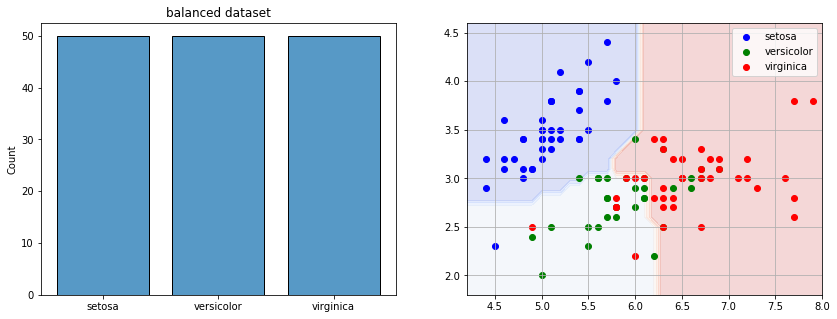

In [141]:
X = np.array(iris[['sepal length (cm)', 'sepal width (cm)']])
y = np.array(iris['species']).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


model = RandomForestClassifier(n_estimators=100, max_depth=2)
model.fit(X_train, y_train)

plt.figure(figsize=(14,5))
plt.subplot(121)
sns.histplot(data=y, multiple="dodge", shrink=.8)
plt.title("balanced dataset")

plt.subplot(122)
plot_decision_boundary(model, X_train[:, 0], X_train[:, 1], y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy over the test sample: {}".format(acc))


However, let's assume that our dataset contains many more "virginica iris" than the other two classes.

The algorithm will try to find the classification rules that maximize the accuracy. However, with this approach it would give much more weight to "virginica" than to the other two classes.

Accuracy over the test sample: 0.8672566371681416


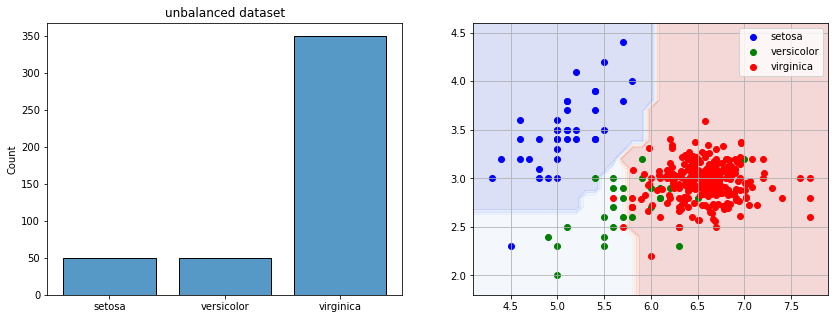

In [142]:
# I increment the number of virginica instances
X_vir = X[y == 'virginica']
y_vir = y[y == 'virginica']
np.mean(X_vir, axis=0)
np.cov(X_vir.T)

x_vir_new = np.random.multivariate_normal(np.mean(X_vir, axis=0), [[np.std(X_vir, axis=0)[0]/10,0],[0,np.std(X_vir, axis=0)[1]/10]], 300)
X_oversampl = np.concatenate([X,x_vir_new])
y_vir_new = ['virginica']*300
y_oversampl = np.concatenate([y,y_vir_new])


X_train, X_test, y_train, y_test = train_test_split(X_oversampl, y_oversampl, test_size=0.25)

# I run the model again
model = RandomForestClassifier(n_estimators=100, max_depth=2)
model.fit(X_train, y_train)

plt.figure(figsize=(14,5))
plt.subplot(121)
sns.histplot(data=y_oversampl, multiple="dodge", shrink=.8)
plt.title("unbalanced dataset")

plt.subplot(122)

plot_decision_boundary(model, X_train[:, 0], X_train[:, 1], y_train)

y_pred = model_os.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy over the test sample: {}".format(acc))



In order to solve this problem we need to find a balance between the three classes. We have two possible strategies.

- Under-sample the majority class. We can do that using <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html">RandomUnderSampler</a>.
- Over-sample the two minority classes. We can do that using <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html">SMOTE</a>.



Accuracy over the test sample: 0.746031746031746


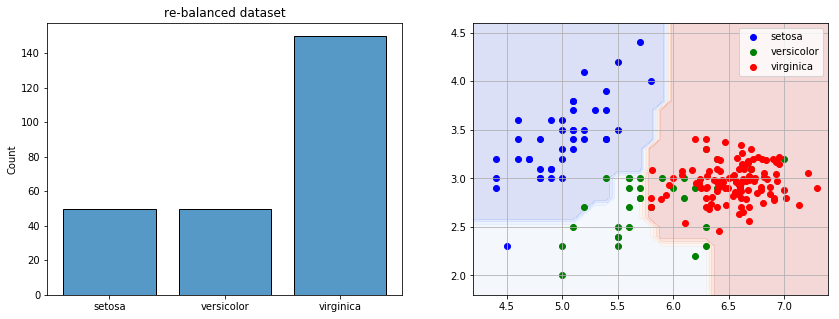

In [144]:
# RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

# This algorithm is usedd just like SMOTE. First I define the strategy, then I create the model, finally I produce the new dataset
strategy = {'setosa':50, 'versicolor':50, 'virginica':150}
under = RandomUnderSampler(sampling_strategy=strategy)
X_under, y_under = under.fit_resample(X_oversampl, y_oversampl)

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.25)

# Again, I run the classifier and I make the plots
model = RandomForestClassifier(n_estimators=100, max_depth=2)
model.fit(X_train, y_train)

plt.figure(figsize=(14,5))
plt.subplot(121)
sns.histplot(data=y_under, multiple="dodge", shrink=.8)
plt.title("re-balanced dataset")

plt.subplot(122)

plot_decision_boundary(model, X_train[:, 0], X_train[:, 1], y_train)

y_pred = model_os.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy over the test sample: {}".format(acc))



Accuracy over the test sample: 0.8141592920353983


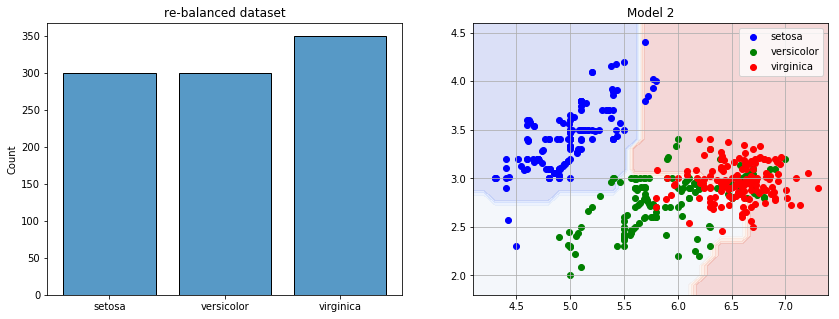

In [148]:
# SMOTE
from imblearn.over_sampling import SMOTE

# This defines the strategy for oversampling. For each class I define how many istances I am going to have.
strategy = {'setosa':150, 'versicolor':150, 'virginica':150}

# This defines the SMOTE's model with the strategy defined above
over = SMOTE(sampling_strategy=strategy, k_neighbors=5)

# Now I create the new dataset that contains 120 instances for "setosa", 120 instances for "versicolor", 150 instances for "virginica"
X_smote, y_smote = over.fit_resample(X_under, y_under)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25)

# Now I run the algorithm and make the plots.
model_2 = RandomForestClassifier(n_estimators=100, max_depth=2)
model_2.fit(X_over, y_over)

plt.figure(figsize=(14,5))
plt.subplot(121)
sns.histplot(data=y_over, multiple="dodge", shrink=.8)
plt.title("re-balanced dataset")

plt.subplot(122)

plot_decision_boundary(model_2, X_smote[:, 0], X_smote[:, 1], y_smote)
plt.title("Model 2")

y_pred = model_2.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy over the test sample: {}".format(acc))



![](https://dl.dropboxusercontent.com/s/ngl0wx9oao2resy/SMOTE.png?dl=0)


# Feature Engineering

We have seen that most of the challenges are related to bad data. Thus, it is of fundamental importance to carefully inspect the data set at the beginning of your project.

The goal of feature engineering is simply to make your data better suited to the problem at hand. For a feature to be useful, it must have a relationship to the target that your model is able to learn.

You can:
- combine different features together
- apply matematical transformations to features
- destructure features (e.g., date --> year, month, day)
- continuing feature --> categorical feature (e.g., age --> child/adult)
- encoding (Tuesday --> 2 or [0,1,0,0,0,0,0])
- Remove

Think very carefully about all these possibilities.



